# <h1><center>Top Spotify Tracks of 2017</center></h1>
---

# Data

The data listed below includes the names, artists, Spotify URIs and audio features of tracks from Spotify's "Top 100 Tracks of 2017" playlist. Descriptions of audio features are from the Spotify Web API.

In analyzing this data, I would like to show similarities as well as differences between the tracks.  By analyzing the different categories of each song, what characteristics are most common?  What songs are the most "formula" songs in the list?

This analysis should provide a good base to predict characteristics for a similar list in 2018 if musical listening trends are to continue as they are currently.

Data provided by Nadin Tamer via kaggle.com

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv('featuresdf.csv')

In [46]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


## Here is a clear definition for each column:

## id
Spotify URI of the song
## name
Name of the song
## artists 
Artist(s) of the song
## danceability 
Danceability describes how suitable a track is for dancing based on a combination of 
musical elements including tempo, rhythm stability, beat strength, 
and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
## energy 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, 
while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute 
include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
## key
The key the track is in. Integers map to pitches using standard Pitch Class notation. 
E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 
## loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the 
entire track and are useful for comparing relative loudness of tracks. 
Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). 
Values typical range between -60 and 0 db.
## mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
## speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
## acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
## instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
## liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
## valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
## tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
## duration_ms
The duration of the track in milliseconds.
## time_signature
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).



# <h1><center>Analytics</center></h1>
***

Now that all columns are defined, we will take a look at the common factors,
as well as the differences, between Spotify's "Top 100 Tracks of 2017."
Let's start with "time signature," "key," and "mode."

## What is the average time signature of the tracks?

In [47]:
df['time_signature'].mean()

3.99

## This shows almost all tracks have a 4/4 time signature (think 1, 2, 3, 4 as your beat).

In [48]:
df.groupby('key')['time_signature'].mean()

key
0.0     4.000000
1.0     4.000000
2.0     4.000000
3.0     4.000000
4.0     4.000000
5.0     4.000000
6.0     4.000000
7.0     4.000000
8.0     3.916667
9.0     4.000000
10.0    4.000000
11.0    4.000000
Name: time_signature, dtype: float64

## The time signature evaluation concludes that all musical keys are represented in the data set.  
8.0, or the key of Ab Major (or F Minor if song is in Minor Mode), is the only key that is not completely made of 4/4 songs.

## Out of 12 options, what musical keys are represented?

In [49]:
df['key'].value_counts()

1.0     14
11.0    13
8.0     12
0.0     10
9.0      9
5.0      9
6.0      9
2.0      8
7.0      7
4.0      4
10.0     4
3.0      1
Name: key, dtype: int64

In [50]:
key_summary = df['key'].value_counts()

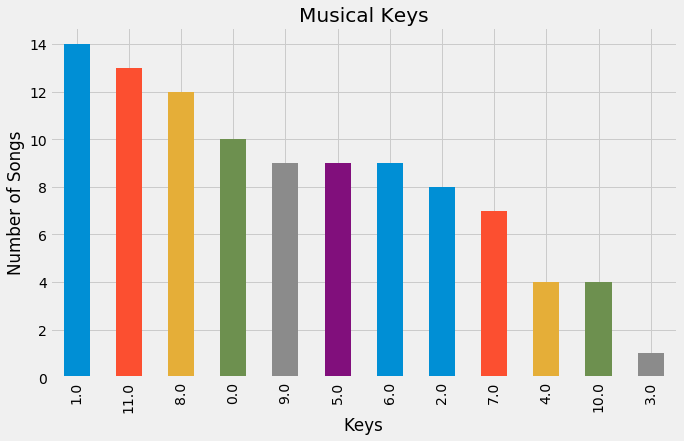

In [51]:
with plt.style.context('fivethirtyeight'):
    key_plot = key_summary.plot(kind = 'bar', figsize = [10, 6])
    key_plot.set_xlabel('Keys')
    key_plot.set_ylabel('Number of Songs')
    key_plot.set_title('Musical Keys')
    plt.xticks(rotation=90)
    plt.show()

All musical keys are represented and are pretty spread out.  There is only 1 song in the key of Eb Major/C Minor (3.0).

## How many songs are in a Major key?  How many are Minor?

In [52]:
df['mode'].value_counts()

1.0    58
0.0    42
Name: mode, dtype: int64

1.0 represents a Major key.  0.0 represents a Minor key.
A major key is typically a "happier" sounding key, whereas a a minor key can either be defined as a more "sad" or "moody" type of key.  **58%** of the songs in the entire playlist are in a **Major key**.

## Going back to the key of "8.0," how many tracks are in Ab Major?  
## How many are in F Minor?

In [53]:
df_eight = df[(df['key'] == 8.0)]
df_eight.groupby('key')['mode'].value_counts()

key  mode
8.0  1.0     8
     0.0     4
Name: mode, dtype: int64

There are **8 tracks in Ab Major** and **4 tracks in F Minor**.  These musical keys share all the same notes; however, 
the notes receive different emphasis and thus are classified in different modes (Major Key Vs. Minor Key).

## Since valence is defined to be how happy/sad a song is, 
## what is the valence represented in both modes?

In [54]:
df.groupby('mode')['valence'].mean()

mode
0.0    0.522921
1.0    0.512797
Name: valence, dtype: float64

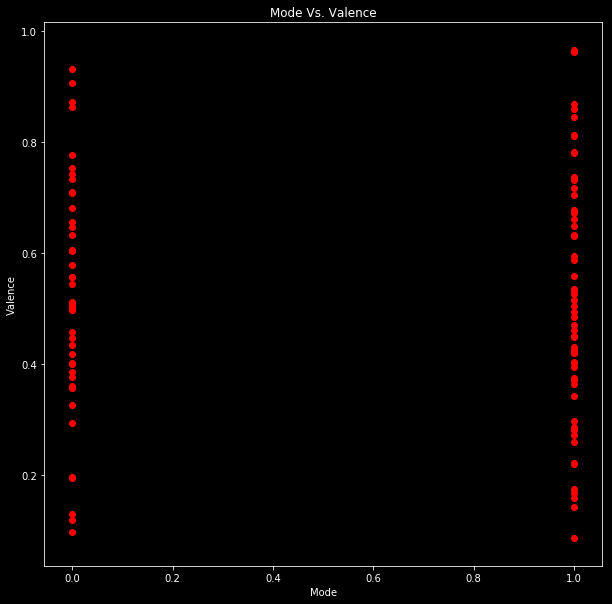

In [55]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['mode'], y = df['valence'], color = 'red' )
    plt.xlabel('Mode')
    plt.ylabel('Valence')
    plt.title('Mode Vs. Valence')
    plt.show()

Valence is pretty similar whether classified as Major or Minor.

## What is the average duration of the songs in the data set?

In [56]:
df['duration_ms'].mean()

218387.28

Convert milliseconds to minutes:

In [57]:
(218387.28 * 0.001) / 60

3.6397880000000002

The average duration of a song in the dataset is **3.64 minutes**.  This is pretty standard for popular songs, which typically last about 3-4 minutes in length.

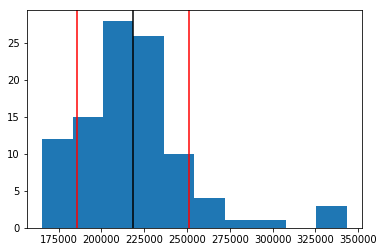

In [58]:
dur_ms = df['duration_ms']
mean = np.mean(dur_ms)
sd = np.std(dur_ms)

plt.hist(dur_ms)
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

Most of the songs are between **187,500 & 237,500 ms**.  There is a skew to the right.

## What tempo is most common?

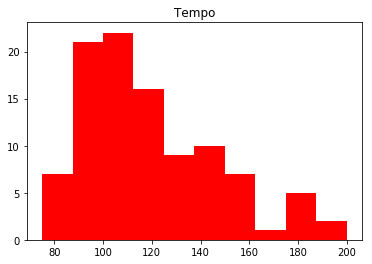

In [59]:
plt.hist(df['tempo'].dropna(), color='red')
plt.title('Tempo')
plt.show()

## Most songs are in the 90-125 bpm range.

One issue with this, as illustrated with **"Despacito - Remix"** and **"Despacito (Featuring Daddy Yankee)** is that tempo's can be calculated in different ways.  For example, both versions are essentially the same song with the same beat; however, they are listed with different tempos.

In [60]:
df[(df['artists'] == 'Luis Fonsi')].head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.12,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.17,0.209,0.0,0.1120,0.846,177.833,228200.0,4.0


You will notice that **"Despacito - Remix"** has essentially half the tempo of **"Despacito (Featuring Daddy Yankee)."**  This illustrates tempo can be calculated in half time (cutting time signature in half) or double time (doubling current time signature).  This different use of tempo unfortunately skews our tempo evaluation.

To zoom in on the larger representation of the data, below is a graph of all tempo's between **60 and 165 bpm**.  Keep in mind, **60 bpm in double time would be 120 bpm.**

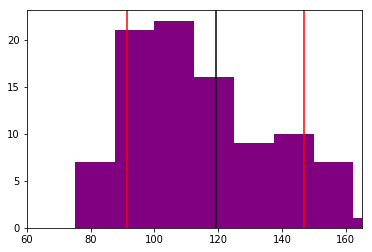

In [61]:
tmpo = df['tempo'].dropna()
mean = np.mean(tmpo)
sd = np.std(tmpo)

plt.hist(tmpo, color='purple')
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.xlim([60, 165])
plt.show()

In [62]:
df['tempo'].describe()

count    100.000000
mean     119.202460
std       27.952928
min       75.016000
25%       99.911750
50%      112.468000
75%      137.166000
max      199.864000
Name: tempo, dtype: float64

## What is the most common loudness for the songs?

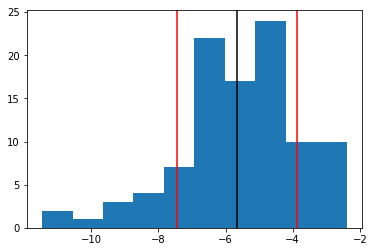

In [63]:
ldness = df['loudness']
mean = np.mean(ldness)
sd = np.std(ldness)

plt.hist(ldness)
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

In [64]:
df['loudness'].describe()

count    100.000000
mean      -5.652650
std        1.802067
min      -11.462000
25%       -6.594500
50%       -5.437000
75%       -4.326750
max       -2.396000
Name: loudness, dtype: float64

The Histogram for **"loudness"** shows a skew to the left.  Most of the songs are in the **-7db to -4.25db range**.

## Are there common factors in the data set between categories?

## Loudness Vs. Acousticness

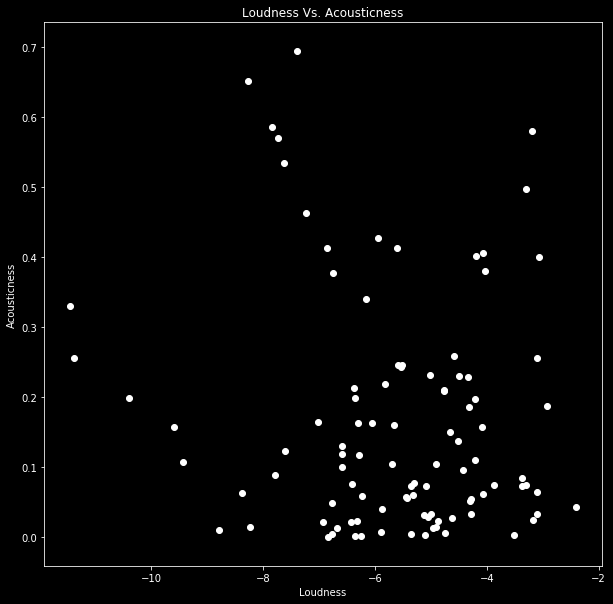

In [65]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['loudness'], y = df['acousticness'], color = 'white' )
    plt.xlabel('Loudness')
    plt.ylabel('Acousticness')
    plt.title('Loudness Vs. Acousticness')
    plt.show()

This graph shows that a we have a cluster of songs in the **-7db to -3db** range that measure from **0.0 to 0.25** in "acousticness".  This makes sense in the fact that a good portion of the tracks measure higher in the "loudness" category but are relatively low in the "acousticness" category.

## Tempo Vs. Loudness

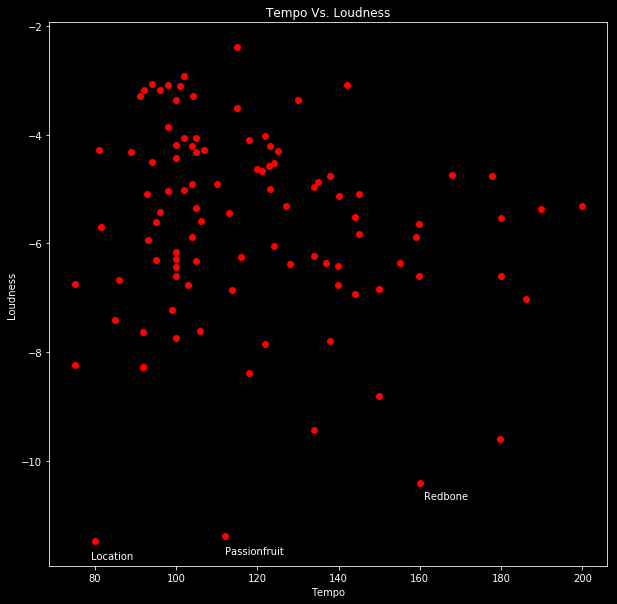

In [66]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['tempo'], y = df['loudness'], color = 'red' )
    plt.xlabel('Tempo')
    plt.ylabel('Loudness')
    plt.title('Tempo Vs. Loudness')
    plt.text(79, -11.8, "Location")
    plt.text(112, -11.7, "Passionfruit")
    plt.text(161, -10.7, "Redbone")
    plt.show()

In [67]:
df[(df['loudness'] < -10)].head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
36,7hDc8b7IXETo14hHIHdnh,Passionfruit,Drake,0.809,0.463,11.0,-11.377,1.0,0.0396,0.256,0.085000,0.1090,0.364,111.980,298941.0,4.0
46,152lZdxL1OR0ZMW6KquMi,Location,Khalid,0.736,0.449,1.0,-11.462,0.0,0.4250,0.330,0.000162,0.0898,0.326,80.126,219080.0,4.0
58,3kxfsdsCpFgN412fpnW85,Redbone,Childish Gambino,0.743,0.359,1.0,-10.401,1.0,0.0794,0.199,0.006110,0.1370,0.587,160.083,326933.0,4.0


Most tracks with a tempo between **80 and 120bpm** are louder than **-8 db**.  The three labeled tracks with
lower "loudness" cover a wide range of tempos.  How relatable to tempo is danceability?

## Tempo Vs. Danceability

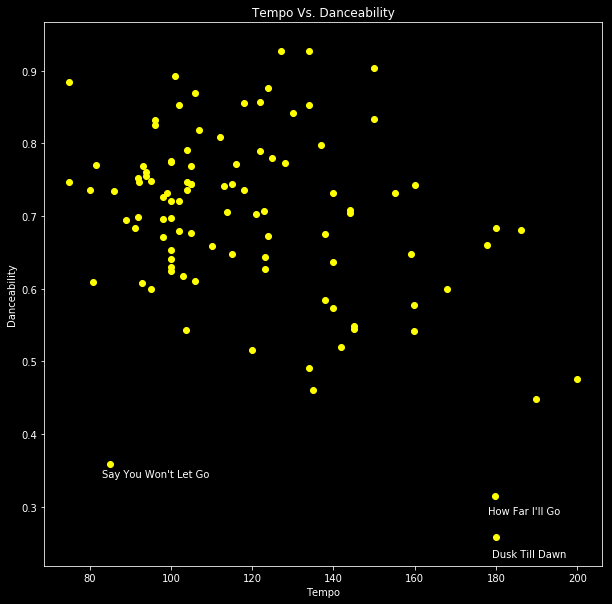

In [68]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['tempo'], y = df['danceability'], color = 'yellow' )
    plt.xlabel('Tempo')
    plt.ylabel('Danceability')
    plt.title('Tempo Vs. Danceability')
    plt.text(83, 0.34, "Say You Won't Let Go")
    plt.text(178, 0.29, "How Far I'll Go")
    plt.text(179, 0.23, "Dusk Till Dawn")
    plt.show()

In [69]:
df[(df['danceability'] < 0.4)].head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
22,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go,James Arthur,0.358,0.557,10.0,-7.398,1.0,0.059,0.695,0.000000,0.0902,0.4940,85.043,211467.0,4.0
66,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,0.314,0.555,9.0,-9.601,1.0,0.370,0.157,0.000108,0.0670,0.1590,179.666,175517.0,4.0
99,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.039,0.101,0.000001,0.1060,0.0967,180.043,239000.0,4.0


Tracks with a bpm between **90 and 130bpm** have a danceability rating between **0.6 and 1.0**.  This makes sense as that tempo range covers a wide array of song genres, such as rock, hip hop, and dance.  Good groove = good sales.

## Danceability Vs. Loudness

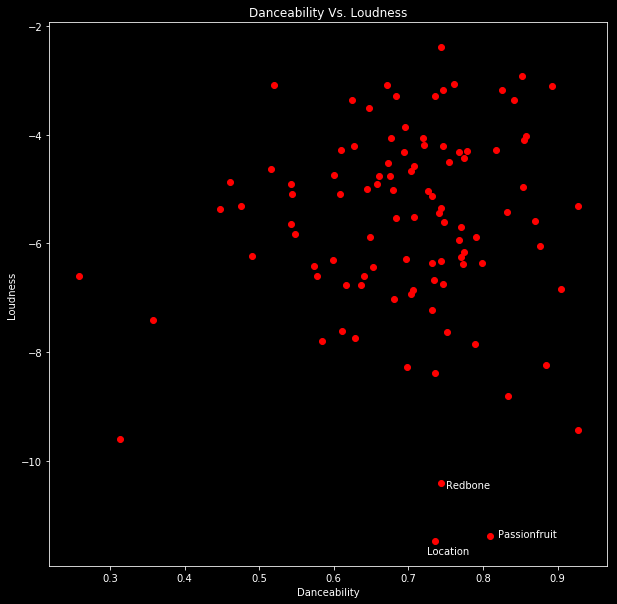

In [70]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['danceability'], y = df['loudness'], color = 'red' )
    plt.xlabel('Danceability')
    plt.ylabel('Loudness')
    plt.title('Danceability Vs. Loudness')
    plt.text(0.75, -10.5, "Redbone")
    plt.text(0.725, -11.7, "Location")
    plt.text(0.82, -11.4, "Passionfruit")
    plt.show()

In [71]:
df[(df['loudness'] < -10)].head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
36,7hDc8b7IXETo14hHIHdnh,Passionfruit,Drake,0.809,0.463,11.0,-11.377,1.0,0.0396,0.256,0.085000,0.1090,0.364,111.980,298941.0,4.0
46,152lZdxL1OR0ZMW6KquMi,Location,Khalid,0.736,0.449,1.0,-11.462,0.0,0.4250,0.330,0.000162,0.0898,0.326,80.126,219080.0,4.0
58,3kxfsdsCpFgN412fpnW85,Redbone,Childish Gambino,0.743,0.359,1.0,-10.401,1.0,0.0794,0.199,0.006110,0.1370,0.587,160.083,326933.0,4.0


"Passionfruit," "Location," and "Redbone" are lower on "loudness," spread out on tempo, but have a higher danceability rating. It is interesting to see that danceability is usually higher for louder songs, but not in all cases.  Let's take a look to see if there are any other trends we can find.

## Category Means

In [72]:
danceability = df['danceability'].mean()
print ("danceability mean = ", danceability)
energy = df['energy'].mean()
print ("energy mean = ", energy)
key = df['key'].mean()
print ("key mean = ", key)
loudness = df['loudness'].mean()
print ("loudness mean = ", loudness)
speechiness = df['speechiness'].mean()
print ("speechiness mean = ", speechiness)
acousticness = df['acousticness'].mean()
print ("acousticness mean = ", acousticness)
instrumentalness = df['instrumentalness'].mean()
print ("instrumentalness mean = ", instrumentalness)
liveness = df['liveness'].mean()
print ("liveness mean = ", liveness)
valence = df['valence'].mean()
print ("valence mean = ", valence)
tempo = df['tempo'].mean()
print ("tempo mean = ", tempo)

danceability mean =  0.6968199999999999
energy mean =  0.6606899999999999
key mean =  5.57
loudness mean =  -5.6526499999999995
speechiness mean =  0.10396899999999999
acousticness mean =  0.16630648999999997
instrumentalness mean =  0.0047961442
liveness mean =  0.15060700000000002
valence mean =  0.5170489999999999
tempo mean =  119.20246000000002


## Category Medians

In [73]:
danceability_med = df['danceability'].median()
print ("danceability median = ", danceability_med)
energy_med = df['energy'].median()
print ("energy median = ", energy_med)
key_med = df['key'].median()
print ("key median = ", key_med)
loudness_med = df['loudness'].median()
print ("loudness median = ", loudness_med)
speechiness_med = df['speechiness'].median()
print ("speechiness median = ", speechiness_med)
acousticness_med = df['acousticness'].median()
print ("acousticness median = ", acousticness_med)
instrumentalness_med = df['instrumentalness'].median()
print ("instrumentalness median = ", instrumentalness_med)
liveness_med = df['liveness'].median()
print ("liveness median = ", liveness_med)
valence_med = df['valence'].median()
print ("valence median = ", valence_med)
tempo_med = df['tempo'].median()
print ("tempo median = ", tempo_med)

danceability median =  0.714
energy median =  0.6675
key median =  6.0
loudness median =  -5.436999999999999
speechiness median =  0.06265
acousticness median =  0.10650000000000001
instrumentalness median =  0.0
liveness median =  0.125
valence median =  0.5025
tempo median =  112.468


In [74]:
feature_mean = [danceability, energy, key, loudness, speechiness, acousticness, 
                instrumentalness, liveness, valence, tempo]
feature_median = [danceability_med, energy_med, key_med, loudness_med, speechiness_med, 
                  acousticness_med,instrumentalness_med, liveness_med, valence_med, tempo_med]
feature_names = ["danceability", "energy", "key", "loudness", "speechiness", "acousticness", 
                 "instrumentalness","liveness", "valence", "tempo"]
feature_summary = pd.DataFrame({"Feature Names":feature_names,
                               "Feature Means":feature_mean,
                               "Feature Medians":feature_median})

In [75]:
feature_summary_no_tempo = feature_summary[(feature_summary["Feature Names"] != "tempo")]

In [76]:
feature_summary.head()

,Feature Names,Feature Means,Feature Medians
0,danceability,0.696820,0.71400
1,energy,0.660690,0.66750
2,key,5.570000,6.00000
3,loudness,-5.652650,-5.43700
4,speechiness,0.103969,0.06265


In [77]:
feature_summary.set_index("Feature Names", inplace = True)

In [78]:
feature_summary_no_tempo.set_index("Feature Names", inplace = True)

In [79]:
feature_summary.head()

,Feature Means,Feature Medians
Feature Names,,
danceability,0.696820,0.71400
energy,0.660690,0.66750
key,5.570000,6.00000
loudness,-5.652650,-5.43700
speechiness,0.103969,0.06265


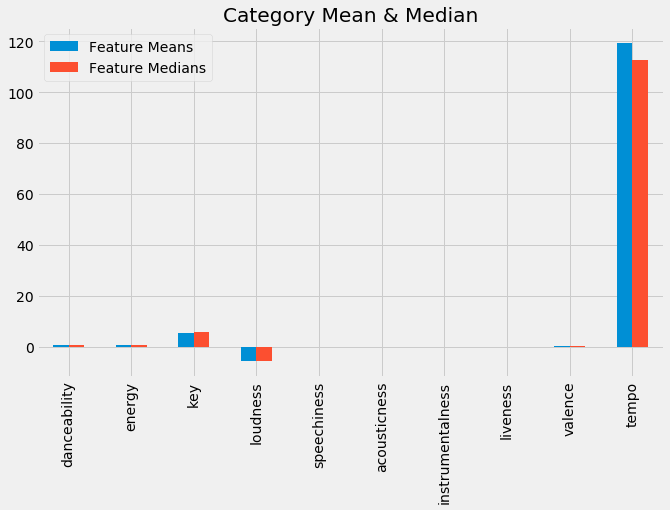

In [80]:
with plt.style.context('fivethirtyeight'):
    feature_final = feature_summary.plot(kind = 'bar', figsize = [10, 6])
    feature_final.set_xlabel('')
    feature_final.set_ylabel('')
    feature_final.set_title('Category Mean & Median')
    plt.xticks(rotation=90)
    plt.show()

Tempo largely skews the view of the graph, so let's take that out to better see everything else.

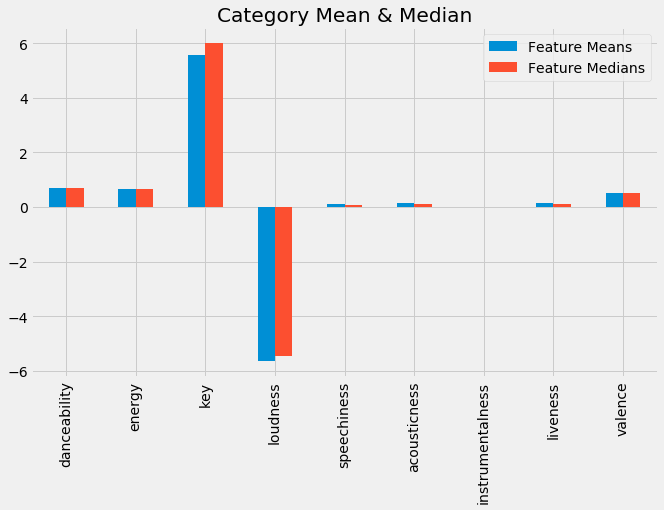

In [81]:
with plt.style.context('fivethirtyeight'):
    feature_final = feature_summary_no_tempo.plot(kind = 'bar', figsize = [10, 6])
    feature_final.set_xlabel('')
    feature_final.set_ylabel('')
    feature_final.set_title('Category Mean & Median')
    plt.xticks(rotation=90)
    plt.show()

These categories seem to all have similar means and medians.  This shows that the categories do not have too many
outlier values.

## Other Items of Note:
It does not appear that the songs are in order of popularity.  There was nothing to denote order from kaggle.com.  Spotify's current "Top Songs of 2017" has 46 songs (as of 7/10/18) and they are in a different order from the data set from kaggle.com as well.

# <h1><center>Common Characteristics and Differences - Summary</center></h1>
---

We now have our parameters to find the songs with the most commonly shared characteristics.  Let's start by filtering tempo, duration, and loudness.  

In [82]:
df_formula_song = df[(df['tempo'] >= 90) & (df['tempo'] <= 125) & (df['duration_ms'] >= 187500) & 
                    (df['duration_ms'] <= 237500) & (df['loudness'] >= -7.0) & (df['loudness'] <= -4.25)]
df_formula_song.shape

(24, 16)

We are down to 24/100 songs.  How can we bring this list down?

In [83]:
df_formula_song_two = df[(df['tempo'] >= 90) & (df['tempo'] <= 125) & (df['duration_ms'] >= 187500) & 
                    (df['duration_ms'] <= 237500) & (df['loudness'] >= -7.0) & (df['loudness'] <= -4.25) &
                    (df['key'] != 3.0) & (df['key'] != 4.0) & (df['key'] != 10.0)]
df_formula_song_two.shape

(20, 16)

Filtering out the outlier musical keys only eliminated 4 songs, so let's filter by mode (Major).

In [84]:
df_formula_song_three = df[(df['tempo'] >= 90) & (df['tempo'] <= 125) & (df['duration_ms'] >= 187500) & 
                    (df['duration_ms'] <= 237500) & (df['loudness'] >= -7.0) & (df['loudness'] <= -4.25) &
                    (df['key'] != 3.0) & (df['key'] != 4.0) & (df['key'] != 10.0) & (df['mode'] == 1.0)]
df_formula_song_three.shape

(10, 16)

In [85]:
df_formula_song_three

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.11900,0.000000,0.0864,0.515,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.02930,0.010100,0.1040,0.733,97.985,233902.0,4.0
11,72jbDTw1piOOj770jWNea,Paris,The Chainsmokers,0.653,0.658,2.0,-6.428,1.0,0.0304,0.02150,0.000002,0.0939,0.219,99.990,221507.0,4.0
24,6De0lHrwBfPfrhorm9q1X,Me Rehúso,Danny Ocean,0.744,0.804,1.0,-6.327,1.0,0.0677,0.02310,0.000000,0.0494,0.426,104.823,205715.0,4.0
38,6EpRaXYhGOB3fj4V2uDkM,Strip That Down,Liam Payne,0.869,0.485,6.0,-5.595,1.0,0.0545,0.24600,0.000000,0.0765,0.527,106.028,204502.0,4.0
44,0qYTZCo5Bwh1nsUFGZP3z,Felices los 4,Maluma,0.755,0.789,5.0,-4.502,1.0,0.1460,0.23100,0.000000,0.3510,0.737,93.973,229849.0,4.0
59,6b8Be6ljOzmkOmFslEb23,24K Magic,Bruno Mars,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983.0,4.0
65,2QbFClFyhMMtiurUjuQlA,Don't Wanna Know (feat. Kendrick Lamar),Maroon 5,0.775,0.617,7.0,-6.166,1.0,0.0701,0.34100,0.000000,0.0985,0.485,100.048,214265.0,4.0
82,3E2Zh20GDCR9B1EYjfXWy,Weak,AJR,0.673,0.637,5.0,-4.518,1.0,0.0429,0.13700,0.000000,0.1840,0.678,123.980,201160.0,4.0
93,7nZmah2llfvLDiUjm0kiy,Friends (with BloodPop®),Justin Bieber,0.744,0.739,8.0,-5.350,1.0,0.0387,0.00459,0.000000,0.3060,0.649,104.990,189467.0,4.0


# <h1><center>Conclusion</center></h1>
---

These are the 10 most "formula" songs of the data set filtered by tempo, duration, loudness, key, and mode.  Time signature was pretty universal, so it was not used as a filter.  

Danceability, energy, speechiness, acousticness, instrumentalness, liveness, and valence all had close means/medians and thus were not included in the filter section.  In addition, these seven measurements did not need to be included in the filter section because they are not inherent qualities of the songs.  Spotify had to determine these categories somehow.

These numbers provide a good base to predict characteristics for a similar list in 2018 if musical listening trends are to continue as they are currently.  Using similar analytics to the ones in this report and adding advanced techniques (such as machine learning) would be a great approach.